<a href="https://www.kaggle.com/code/leonidasemman/nba-1996-2022-analysis?scriptVersionId=221822104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NBA 1996-2022 Analysis 
## Contents  
- [Introduction](#Introduction)
- [Feature Explanation](#Feature-Explanation)
- [Data Cleaning](#Data-Cleaning)
- [Key Questions](#KeyQuestions)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Feature-Engineering](#Feature-Engineering)
- [NBA Trends & Analysis](#NBA-Trends-and-Analysis)
- [Player Impact & Career Performance](#Player-Impact-and-Career-Performance)

## Introduction

The NBA is one of the most popular sports in the world. Top basketball players from all over the globe dream of reaching the level required to earn a spot in this highly competitive league.

In this notebook, we will explore the NBA from the 1996 season to 2023. Our analysis will focus on differences in key basketball metrics each year, as well as the players who stood/stand out during different periods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/nba-players-data/all_seasons.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
# print(plt.style.available)
plt.style.use('ggplot')
print(f'Dataset Shape: {df.shape}')

Dataset Shape: (12844, 22)


## Feature-Explanation
This dataset contains 22 columns and 12844 observations.

- `Unnamed 0:`- 
- `player_name` : Name of the player  
- `team_abbreviation` : Name of the team the   player played for (at the end of the season)       
- `age` : Age of the player  
- `player_height` : Height of the player  
- `player_weight` : Weight of the player  
- `college` : Name of the college of the player attended  
- `country` : Name of the country the player was born in  
- `draft_year` : The year the player was drafted  
- `draft_round` : The draft round the player was picked  
- `draft_number` : The number at which the player was drafted in his draft round  
- `gp` : Games played throughout the season  
- `pts` : Average number of points scored  
- `reb` : Average number of rebounds grabbed  
- `ast` : Average number of assists distributed  
- `net_rating` : Team's point differential per 100 possessions while the player is on the court  
- `oreb_pct` : Percentage of available offensive rebounds the player grabbed while he was on the floor  
- `dreb_pct` : Percentage of available defensive rebounds the player grabbed while he was on the floor  
- `usg_pct` : Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)  
- `ts_pct` : Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2*(FGA + 0.44 FTA))  
- `ast_pct` : Percentage of teammate field goals the player assisted while he was on the floor  
- `season` : NBA season

## Data Cleaning
This dataset contains some individual players multiple times due to the collection of their statistics every year.  

We will split our analysis in two parts:
- Analyzing the NBA over the years
- Transforming the dataset to represent NBA players average career stats

In [4]:
df.isnull().sum()

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

Some players have missing data in the `college` column. However, since our analysis does not focus on a player's college, this will not affect our data exploration.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

- At first we drop the first column `Unnamed: 0`, because it does not give any information.
- Secondly, we turn the `draft_round` and `draft_number` features into numeric. Hence, we replace the value *Undrafted* that represents the undrafted players with the number 0. Therefore when the value is 0 in these features it means that this player was undrafted.
- Finally, we transform the variable `season` in a way that we can turn it into numeric.

In [6]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

df['draft_round'] = df['draft_round'].replace('Undrafted', 0)
df['draft_number'] = df['draft_number'].replace('Undrafted', 0)

df['draft_round'] = df['draft_round'].astype(int)
df['draft_number'] = df['draft_number'].astype(int)

def extract_start_year(season_str):
    return int(season_str[:4])  

df['season'] = df['season'].apply(extract_start_year)

## KeyQuestions

These questions will guide our exploration and uncover insights into the dynamics of NBA players's performance over the years.
  
### 1. Country Distribution of NBA players  
- How is the NBA player's country distribution ?

### 2. Total Number of NBA Players
- What's the total number of NBA players over the years ?

### 3. Changes in Maximum Points per Game
- How does the Maximum Points per Game change over the years ? 

### 4. Best Scoring Seasons
- Which NBA players had/have the best seasons in scoring in the last 25 years ?

### 5. Best Playmaking Seasons  
- Which NBA players had/have the best seasons in playmaking in the last 25 years ?

### 6. Consistent All-Star Level Players  
- How many NBA players performed at an All-Star level consistently ?

### 7. Most Dominant Players   
- Who were/are the most dominant players in the last 25 years ?

### 8. Best Playmakers and Scorers  
- Who were/are the best playmakers and scorers in the last 25 years ?

### 9. High Impact Contributors  
- Which NBA players had/have the most impactful contributions to their teams ?

## Exploratory Data Analysis

In [7]:
df.nunique()

player_name          2551
team_abbreviation      36
age                    27
player_height          30
player_weight         157
college               356
country                82
draft_year             48
draft_round             8
draft_number           75
gp                     85
pts                   319
reb                   153
ast                   115
net_rating            772
oreb_pct              216
dreb_pct              352
usg_pct               348
ts_pct                563
ast_pct               483
season                 27
dtype: int64

By looking at the following barplot, we observe that most of the players didn't participate in the NBA draft.

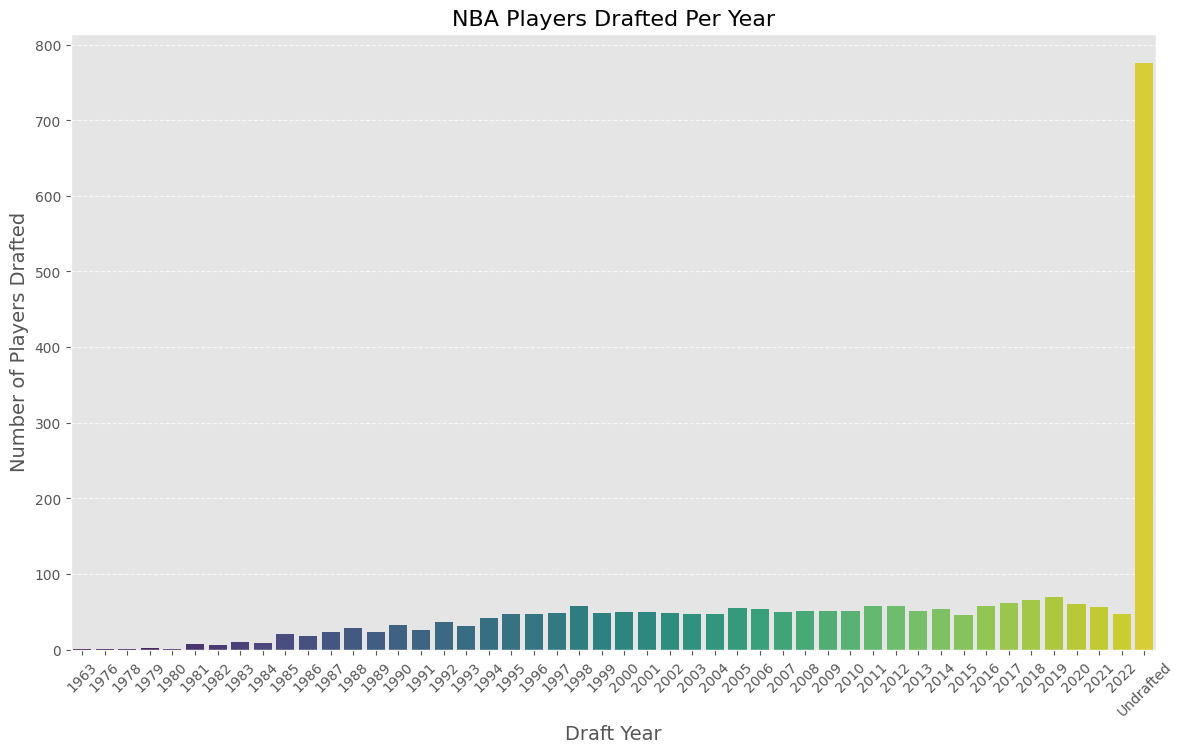

In [8]:
df_unique = df[['player_name', 'draft_year']].drop_duplicates()

draft_counts = df_unique["draft_year"].value_counts().sort_index()
plt.figure(figsize=(14, 8))
sns.barplot(x=draft_counts.index, y=draft_counts.values, palette="viridis")

plt.xlabel("Draft Year", fontsize=14)
plt.ylabel("Number of Players Drafted", fontsize=14)
plt.title("NBA Players Drafted Per Year", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Let's see the NBA players drafted per year, by excluding those who didn't participate in the draft.

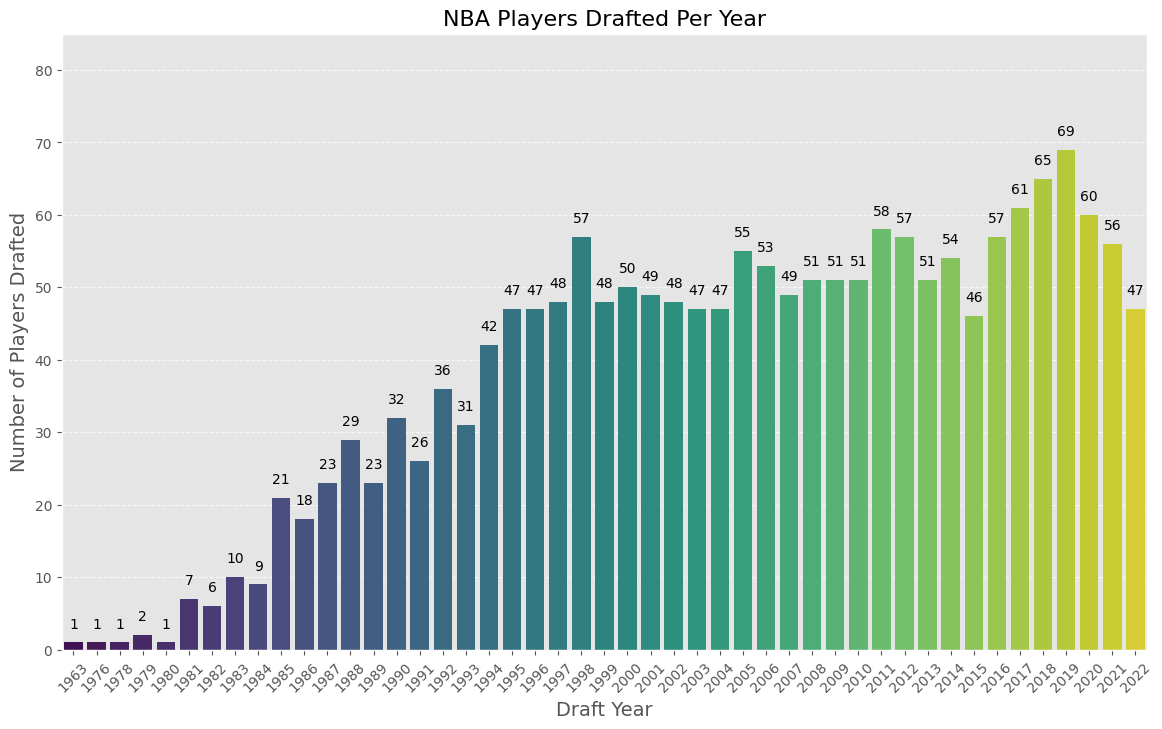

In [9]:
df_unique = df[['player_name', 'draft_year']].drop_duplicates()
df_unique = df_unique[df_unique["draft_year"] != "Undrafted"]

draft_counts = df_unique["draft_year"].value_counts().sort_index()

draft_counts.index = draft_counts.index.astype(str)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=draft_counts.index, y=draft_counts.values, palette="viridis")

for i, value in enumerate(draft_counts.values):
    plt.text(i, value + 2, str(value), ha="center", fontsize=10, fontweight="normal")

plt.xlabel("Draft Year", fontsize=14)
plt.ylabel("Number of Players Drafted", fontsize=14)
plt.title("NBA Players Drafted Per Year", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(0, 85)

plt.show()

Next, we explore the numerical variables in the dataset in order to identify their distributions and their main statistics, such as location measures (mean, median) and measures of variability (variance, range).

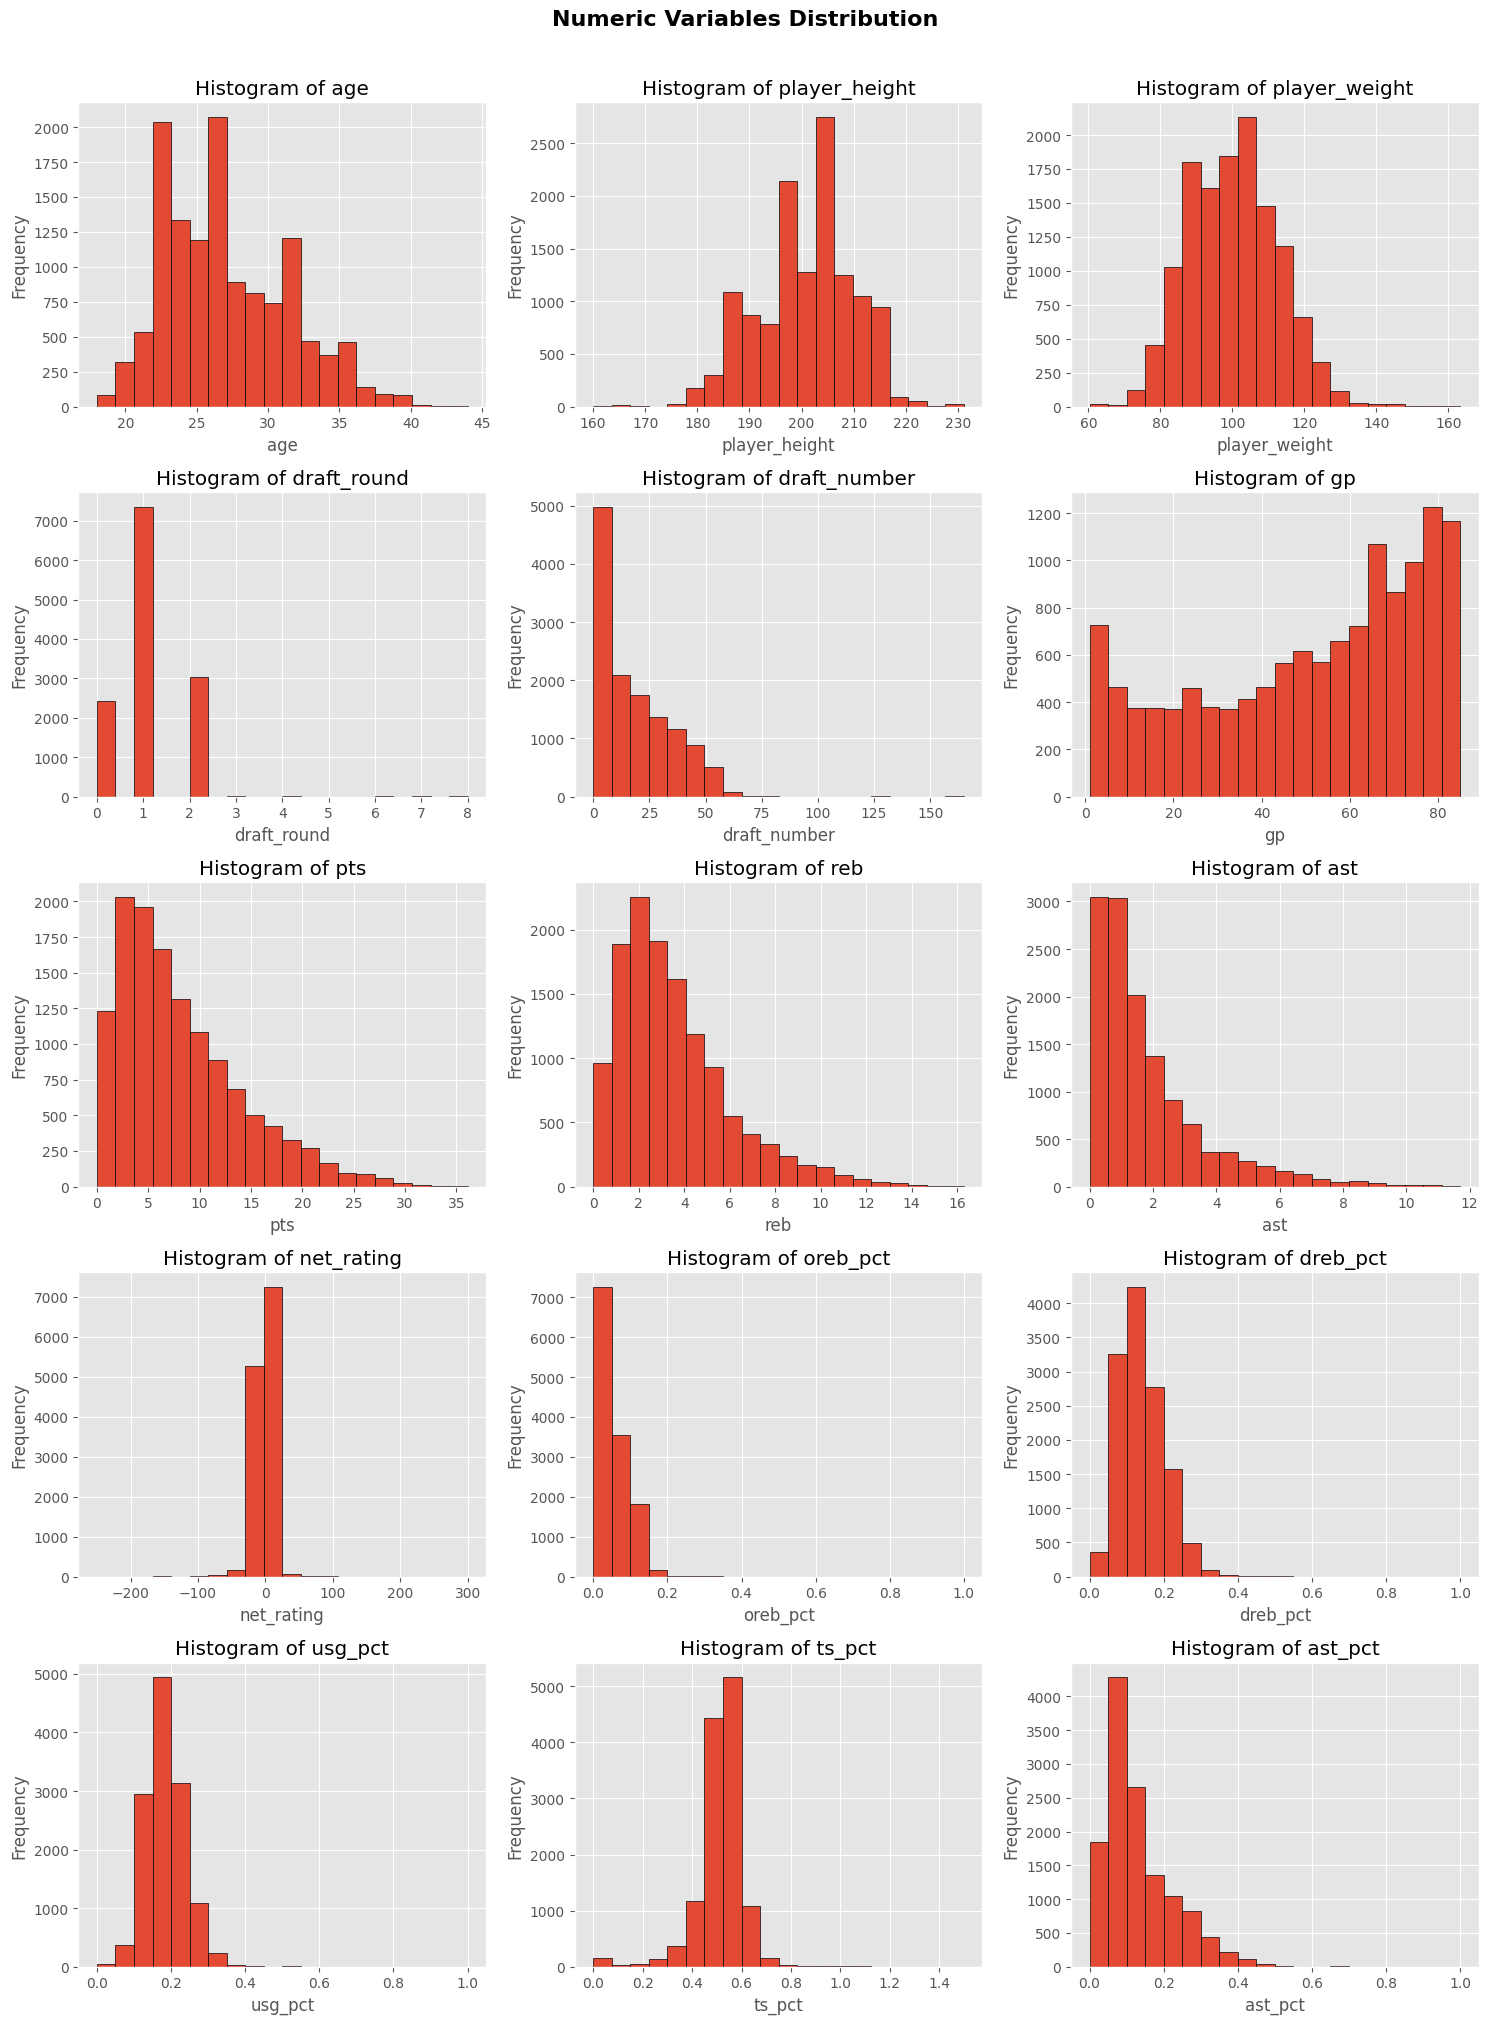

In [10]:
numeric_columns = df.select_dtypes(include='number').drop('season', axis=1)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.suptitle('Numeric Variables Distribution', y=1.01, fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
    axes[i].hist(numeric_columns[column], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12844.0,27.045313,4.339211,18.000000,24.0000,26.00000,30.00000,44.00000
player_height,12844.0,200.555097,9.111090,160.020000,193.0400,200.66000,208.28000,231.14000
player_weight,12844.0,100.263279,12.426628,60.327736,90.7184,99.79024,108.86208,163.29312
draft_round,12844.0,1.059172,0.683223,0.000000,1.0000,1.00000,1.00000,8.00000
draft_number,12844.0,17.774914,16.803276,0.000000,3.0000,14.00000,29.00000,165.00000
gp,12844.0,51.154158,25.084904,1.000000,31.0000,57.00000,73.00000,85.00000
pts,12844.0,8.212582,6.016573,0.000000,3.6000,6.70000,11.50000,36.10000
reb,12844.0,3.558486,2.477885,0.000000,1.8000,3.00000,4.70000,16.30000
ast,12844.0,1.824681,1.800840,0.000000,0.6000,1.20000,2.40000,11.70000
net_rating,12844.0,-2.226339,12.665124,-250.000000,-6.4000,-1.30000,3.20000,300.00000


### 1. Country Distribution of NBA players
Many NBA players come from different countries around the world. Although most players are from the USA, it would be interesting to see which countries produce the most players in the league.

In [12]:
pd.set_option('display.max_rows', None)
df['country'].value_counts()

country
USA                                 10721
Canada                                205
France                                190
Australia                             100
Spain                                  93
Brazil                                 86
Turkey                                 76
Slovenia                               76
Croatia                                72
Serbia                                 70
Argentina                              67
Germany                                66
Lithuania                              65
Ukraine                                45
Nigeria                                43
Italy                                  42
Senegal                                42
Russia                                 37
Montenegro                             35
Dominican Republic                     35
Georgia                                34
Serbia and Montenegro                  33
Greece                                 32
Democratic Republic of the

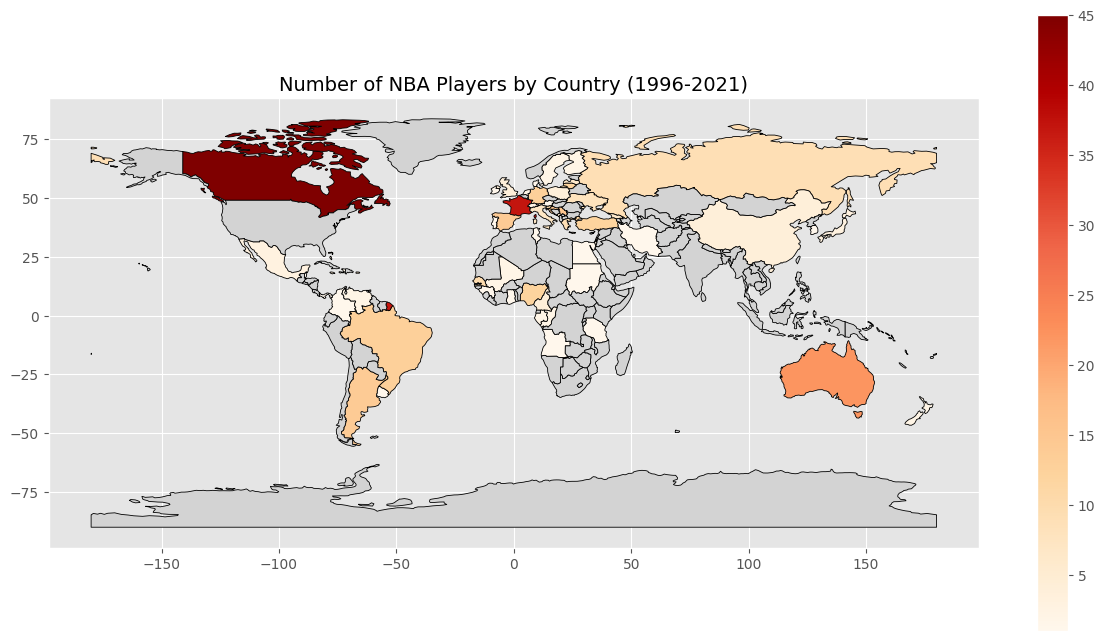

,count,relative_freq
country,,
USA,2140,83.63%
Canada,45,1.76%
France,37,1.45%
Australia,22,0.86%
Croatia,15,0.59%
Serbia,15,0.59%
Argentina,14,0.55%
Spain,14,0.55%
Germany,13,0.51%


In [13]:
df_unique = df[['player_name', 'country']].drop_duplicates()

country_counts = df_unique['country'].value_counts().reset_index()
country_counts.columns = ['country', 'playerCount']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(country_counts, how="left", left_on="name", right_on="country")

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(column='playerCount', cmap='OrRd', linewidth=0.6, edgecolor='black',
           legend=True, ax=ax, missing_kwds={"color": "lightgrey"})
plt.title("Number of NBA Players by Country (1996-2021)", fontsize=14)
plt.show()

pd.set_option('display.max_rows', None)
country_counts = pd.DataFrame(df_unique.country.value_counts())
country_counts.rename(columns={"country": "players_cnt"}, inplace=True)

country_counts['relative_freq'] = ((country_counts['count'] / country_counts['count'].sum()) * 100).round(2).astype(str) + '%'
country_counts


The 83.63 % of the total players are from USA
The 16.37 % of the total players are from the rest of the world



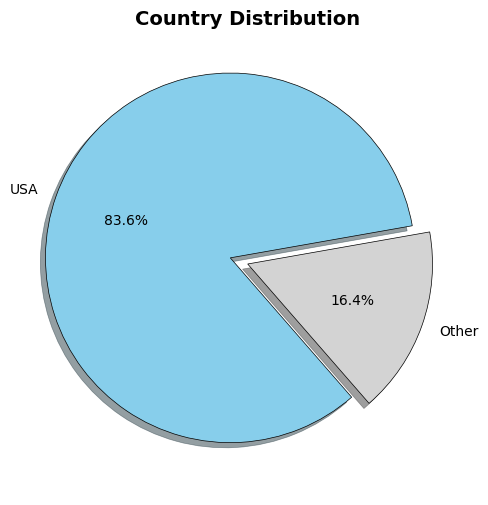

In [14]:
americans = df_unique[df_unique['country']=='USA'].shape[0]
non_americans = df_unique[df_unique['country']!='USA'].shape[0]
americans_pct = americans/df_unique.shape[0]
non_americans_pct = non_americans/df_unique.shape[0]

print("")
print(f'The {100*americans_pct:.2f} % of the total players are from USA')
print(f'The {100*non_americans_pct:.2f} % of the total players are from the rest of the world')

print("")

labels = ['USA', 'Other']
sizes = [americans, non_americans]  
colors = ['skyblue', 'lightgray']  
explode = (0.1, 0) 

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, 
        startangle=10, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.ylabel('')  
plt.title('Country Distribution', fontsize=14, fontweight='bold')  
plt.show()

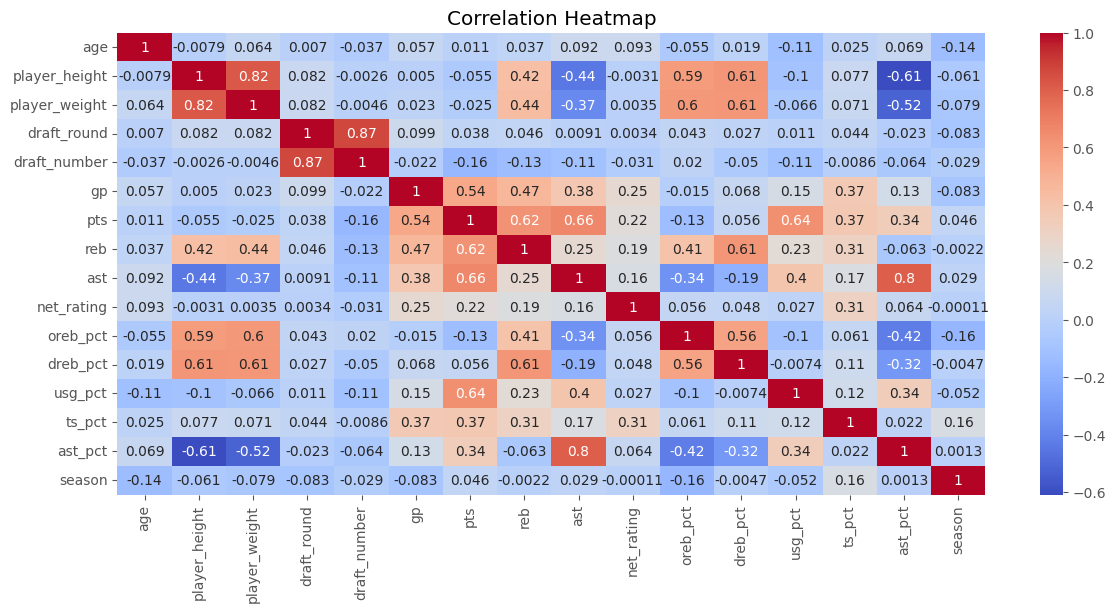

In [15]:
plt.figure(figsize = (14,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Feature Engineering
We are interested in the consistency of the players in this competetive level. That's why we create a new variable that measures the total seasons a player had/has been playing in the NBA

In [16]:
df['SeasonsPlayed'] = df.groupby('player_name')['season'].transform('nunique')
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,SeasonsPlayed
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996,11
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996,1
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996,9
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996,6
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996,2


## NBA Trends and Analysis
Initially, we are going to analyze the NBA stats over the years. Then we will deep into some of the best seasons in scoring and assisting and find out the stand out players.
- Let's explore the new feature `SeasonsPlayed` we created :

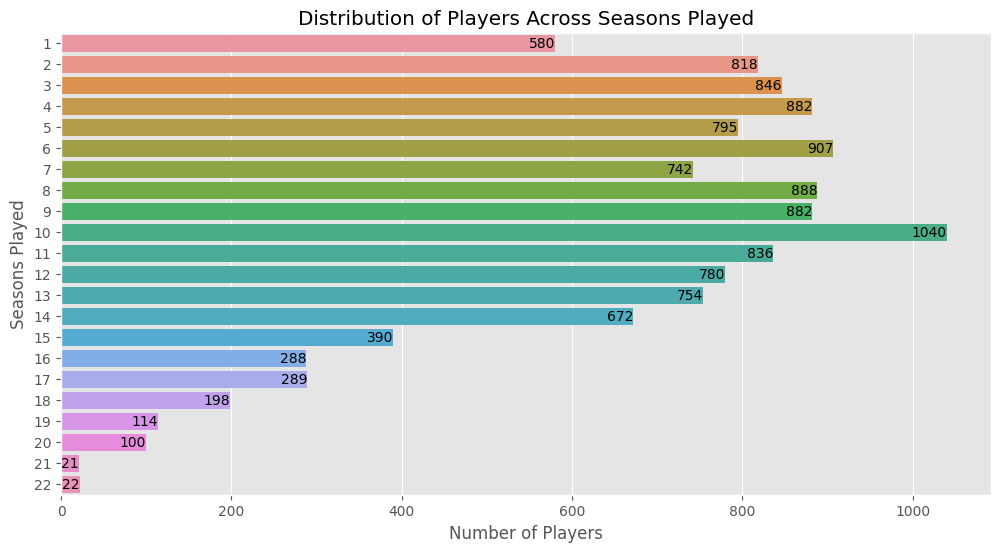

count    12844.000000
mean         8.574198
std          4.713337
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         22.000000
Name: SeasonsPlayed, dtype: float64

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, y = df['SeasonsPlayed'])
for index, value in enumerate(df['SeasonsPlayed'].value_counts().sort_index()):
    plt.text(value, index, str(value), ha='right', va='center', fontsize=10, color='black')

plt.title('Distribution of Players Across Seasons Played')
plt.xlabel('Number of Players')
plt.ylabel('Seasons Played')

plt.show()

df['SeasonsPlayed'].describe()

Observing the data, it appears that three-quarters of the population participate in the NBA for up to 12 seasons, while the remaining one-quarter extends their careers beyond this mark.
From the horizontal bar plot above, it is remarkable how the frequency of basketball players remaining in the competitive league declines after the 14th season as well as the fact that only 43 players have the accomplishment of playing in the NBA more than 20 seasons.

### 2. Total Number of NBA players  
The NBA has strategically expanded its player pool by creating more contract options, increasing global scouting, and using the G League as a talent pipeline. This trend has allowed for a larger number of players to participate in the league, improving overall competition and entertainment value.  
The following plot highlights the increase in the number of NBA players starting from 2010. It appears that teams have expanded their rosters, providing more opportunities for basketball players to secure a position in the league.

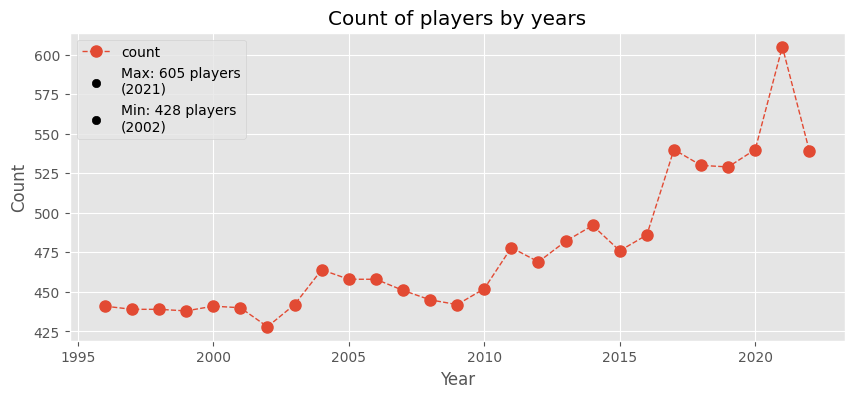

In [18]:
plt.figure(figsize=(10, 4))
df['season'].value_counts().sort_index().plot(marker='o', linestyle='--', markersize=8, linewidth=1)

max_year = df['season'].value_counts().idxmax()
min_year = df['season'].value_counts().idxmin()
max_count = df['season'].value_counts().max()
min_count = df['season'].value_counts().min()

plt.scatter(max_year, max_count, color='black', label=f'Max: {max_count} players\n({max_year})')
plt.scatter(min_year, min_count, color='black', label=f'Min: {min_count} players\n({min_year})')

plt.title('Count of players by years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

### 3. Changes in Maximum Points per Game
- The NBA has seen some of the greatest scorers in basketball history, with certain players dominating individual seasons by posting exceptionally high points-per-game (PPG) averages.  
- The following line plot visualizes the maximum PPG recorded in each NBA season, helping us understand how elite scoring has evolved over time.  
- Finally, we explore every NBA leading scorer in PPG from 1996 up to 2022 with their corresponding stats in rebounding and assisting as well.

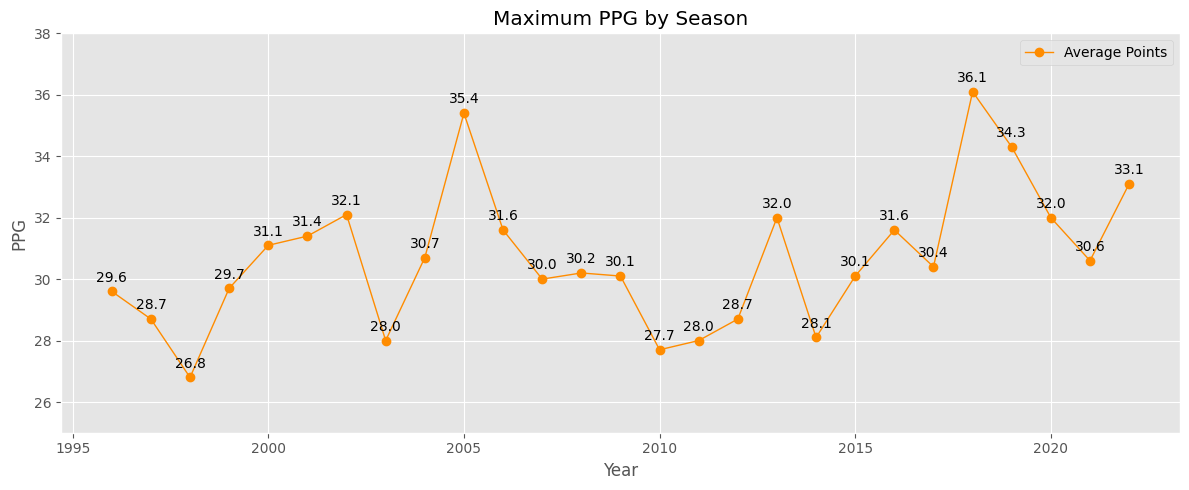

,player_name,pts,reb,ast,country
season,,,,,
2022,Joel Embiid,33.1,10.2,4.2,Cameroon
2021,Joel Embiid,30.6,11.7,4.2,Cameroon
2020,Stephen Curry,32.0,5.5,5.8,USA
2019,James Harden,34.3,6.6,7.5,USA
2018,James Harden,36.1,6.6,7.5,USA
2017,James Harden,30.4,5.4,8.8,USA
2016,Russell Westbrook,31.6,10.7,10.4,USA
2015,Stephen Curry,30.1,5.4,6.7,USA
2014,Russell Westbrook,28.1,7.3,8.6,USA


In [19]:
plt.figure(figsize=(12, 5))

plt.plot(df.groupby('season')['pts'].max(), marker='o', label='Average Points', linestyle='-', markersize=6, linewidth=1,color = 'darkorange')

for season, points in df.groupby('season')['pts'].max().items():
    plt.annotate(f'{points:.1f}', (season, points),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.title('Maximum PPG by Season')
plt.xlabel('Year')
plt.ylabel('PPG')
plt.ylim(25,38)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

df.loc[df.groupby('season')['pts'].idxmax(), ['season', 'player_name', 'pts', 'reb', 'ast', 'country']].set_index('season').sort_index(ascending=False)

### 4. Top 10 Scoring Seasons
Let's explore the top 10 seasons in scoring in the NBA in the last 25 years and see who are the players who stood out during this period, noticing their main stats (rebounds, assists).

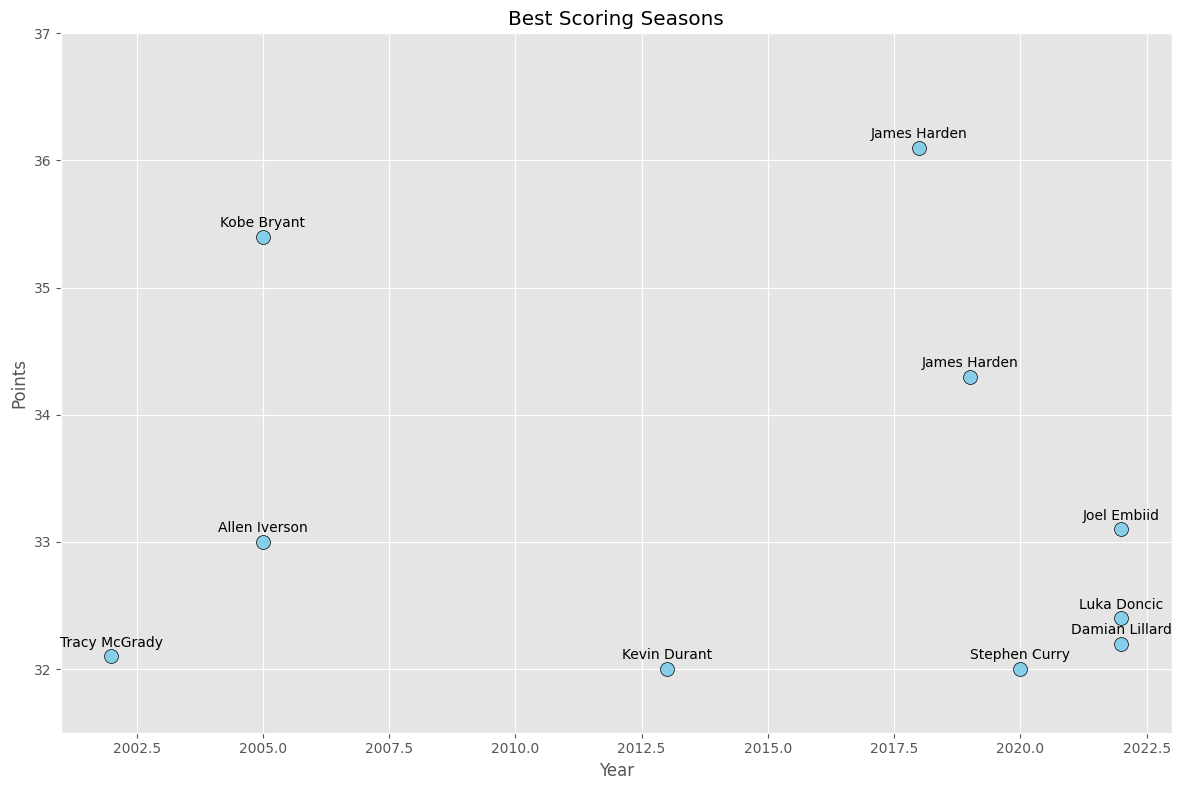

,pts,reb,ast,draft_number
player_name,,,,
James Harden,36.1,6.6,7.5,3
Kobe Bryant,35.4,5.3,4.5,13
James Harden,34.3,6.6,7.5,3
Joel Embiid,33.1,10.2,4.2,3
Allen Iverson,33.0,3.2,7.4,1
Luka Doncic,32.4,8.6,8.0,3
Damian Lillard,32.2,4.8,7.3,6
Tracy McGrady,32.1,6.5,5.5,9
Stephen Curry,32.0,5.5,5.8,7


In [20]:
best_scoring_seasons = df.sort_values(by = ['pts','ast'], ascending = [False,False]).head(10)

plt.figure(figsize=(12, 8))
plt.scatter(best_scoring_seasons['season'], best_scoring_seasons['pts'], s=100, color='skyblue', edgecolors='black')

for i, player in enumerate(best_scoring_seasons['player_name']):
    plt.annotate(player, (best_scoring_seasons['season'].iloc[i], best_scoring_seasons['pts'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Best Scoring Seasons')
plt.ylim(31.5, 37.0)  # Set the y-axis limits
plt.grid(True)
plt.tight_layout()
plt.show()

best_scoring_seasons[['player_name','pts','reb','ast','draft_number']].set_index('player_name')

### 5. Top 10 Playmaking Seasons  
Next we focus on the seasons with the highest assist percentage by a player. A player's assist percentage shows how often a player assist his teammates. Since a player can only get an assist when his teammate makes a field goal, AST% looks at how many of these teammate made field goals were a result of that player's assists.

We identify the top playmakers in the league throughout the years, focusing on those who have participated in at least of the 25% of the NBA games (20 games) within a season, along with their corresponding passing statistics and the season they stood out.

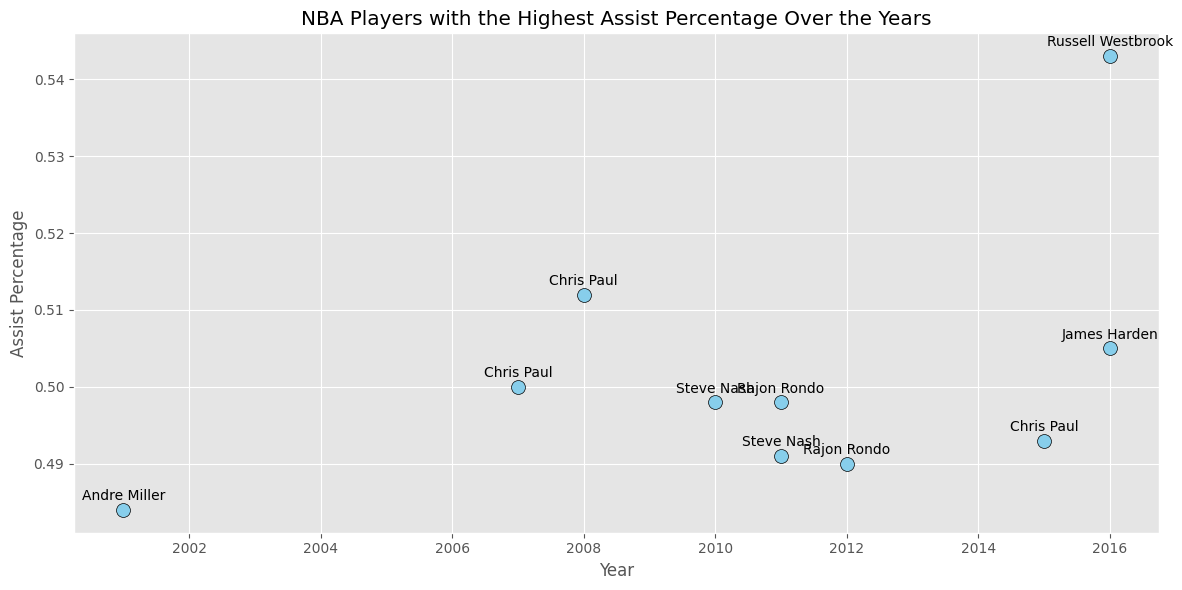

,ast_pct,ast,season
player_name,,,
Russell Westbrook,0.543,10.4,2016
Chris Paul,0.512,11.0,2008
James Harden,0.505,11.2,2016
Chris Paul,0.500,11.6,2007
Rajon Rondo,0.498,11.7,2011
Steve Nash,0.498,11.4,2010
Chris Paul,0.493,10.0,2015
Steve Nash,0.491,10.7,2011
Rajon Rondo,0.490,11.1,2012


In [21]:
pass_skills = df.sort_values(by = 'ast_pct', ascending = False)[df['gp'] > 20]
pass_skills1 = pass_skills[['player_name','ast_pct','ast','season']].head(10)
pass_skills1.set_index('player_name')

plt.figure(figsize=(12, 6))
plt.scatter(pass_skills1['season'], pass_skills1['ast_pct'], s=100, color='skyblue', edgecolors='black')

for i, player in enumerate(pass_skills1['player_name']):
    plt.annotate(player, (pass_skills1['season'].iloc[i], pass_skills1['ast_pct'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Year')
plt.ylabel('Assist Percentage')
plt.title('NBA Players with the Highest Assist Percentage Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

pass_skills1.set_index('player_name')

## Player Impact and Career Performance
While the previous analysis focused on league-wide trends and seasonal statistics, this section highlights the perspective to individual player careers. To achieve this, the dataset was transformed using the `groupby()` function

In [22]:
df1 = df.groupby('player_name', as_index=False).mean(numeric_only=True).round(2)
df1.head()

,player_name,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,SeasonsPlayed
0,A.C. Green,35.0,205.74,102.06,1.0,23.0,75.80,5.78,6.06,0.86,-1.88,0.09,0.19,0.13,0.49,0.05,1998.0,5.0
1,A.J. Bramlett,23.0,208.28,102.97,2.0,39.0,8.00,1.00,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00,1999.0,1.0
2,A.J. Guyton,24.0,185.42,81.65,2.0,32.0,26.67,3.80,0.70,1.57,-6.70,0.01,0.04,0.22,0.32,0.28,2001.0,3.0
3,A.J. Lawson,22.0,198.12,81.19,0.0,0.0,15.00,3.70,1.40,0.10,-20.10,0.05,0.15,0.19,0.59,0.03,2022.0,1.0
4,AJ Green,23.0,195.58,86.18,0.0,0.0,35.00,4.40,1.30,0.60,-4.90,0.02,0.10,0.16,0.61,0.09,2022.0,1.0


This transformation ensures that each player appears only once in the dataset, with all their statistics averaged across their entire career. By analyzing these career-averaged stats, we can gain deeper insights into player consistency, dominance, and overall impact on the game.

The key aspects explored in this section include:  
- Consistency: Identifying players with stable performances across multiple seasons.  
- Domination: Players who stood/stand out in both scoring (PPG) and rebounding (RPG).  
- Playmaking: Players who effectively combine scoring (PPG) and assists (APG).  
- Team Impact: Assessing overall contributions based on net rating metric.

By evaluating these factors, we can recognize which players had the greatest impact throughout their careers, beyond just one season wonder.  

After transforming the dataset to calculate career-averaged statistics, certain columns become irrelevant for analysis. Specifically:

- `season` : Since we are aggregating data for each player across multiple seasons, this column has no longer meaning, as each player now has only one row representing their entire career.
- `age` : Averaging age across seasons does not provide meaningful insights, as a player's age changes every year.

In [23]:
df1.drop('season', axis = 1, inplace = True)
df1.drop('age', axis = 1, inplace = True)
print(f'Original Dataset: {df.shape}')
print(f'New Dataset: {df1.shape}')

Original Dataset: (12844, 22)
New Dataset: (2551, 16)


### Feature Engineering
We create a new column that categorizes if a player was/is in all star level during his career based on the following metrics:  
- Top 10%  Scoring Low
- Top 10%  Rebounding Low
- Top 10%  Passing Low

If an NBA player belongs to one of those subsets, it means that is better in the corresponding category from at least the 90% of the entire NBA.

In [24]:
scoring = round(df1['pts'].quantile(0.9),2)
rebounding = round(df1['reb'].quantile(0.9),2)
passing = round(df1['ast'].quantile(0.9),2)

print(f'Top 10 % Scoring Low: {scoring}')
print(f'Top 10 % Rebounding Low: {rebounding}')
print(f'Top 10 % Passing Low: {passing}')

Top 10 % Scoring Low: 12.23
Top 10 % Rebounding Low: 5.23
Top 10 % Passing Low: 3.02


We define an **all-star player** by not only consistently achieving a points per game performance higher than 90% of the population but also surpassing the 90th percentile in either rebounds or assists per game

In [25]:
# Create a new columns that categorizes if a player was/is in all star level based on the above metrics:
df1['all_star'] = np.where(((df1['pts'] > scoring) & (df1['reb'] > rebounding)) | ((df1['pts'] > scoring) & (df1['ast'] > passing)), 'Yes', 'No')
df1.head()

,player_name,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,SeasonsPlayed,all_star
0,A.C. Green,205.74,102.06,1.0,23.0,75.80,5.78,6.06,0.86,-1.88,0.09,0.19,0.13,0.49,0.05,5.0,No
1,A.J. Bramlett,208.28,102.97,2.0,39.0,8.00,1.00,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00,1.0,No
2,A.J. Guyton,185.42,81.65,2.0,32.0,26.67,3.80,0.70,1.57,-6.70,0.01,0.04,0.22,0.32,0.28,3.0,No
3,A.J. Lawson,198.12,81.19,0.0,0.0,15.00,3.70,1.40,0.10,-20.10,0.05,0.15,0.19,0.59,0.03,1.0,No
4,AJ Green,195.58,86.18,0.0,0.0,35.00,4.40,1.30,0.60,-4.90,0.02,0.10,0.16,0.61,0.09,1.0,No


### 6. Consistent All-Star Level Players
Let's explore the new feature (`all_star`) that we just created.

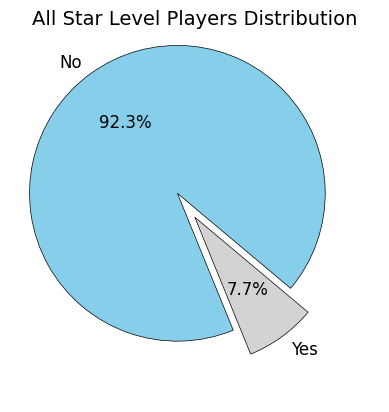

In [26]:
df1['all_star'].value_counts().plot.pie(
    autopct='%1.1f%%',  
    labels=['No', 'Yes'],
    colors=['skyblue', 'lightgray'], 
    wedgeprops={'edgecolor': 'black'}, 
    startangle=320, 
    fontsize=12,  
    explode=(0.2, 0)
)

plt.ylabel('')  
plt.title('All Star Level Players Distribution', fontsize=14, fontweight='normal')  

plt.show()

- We notice that only the 7.8% of the NBA players in the last 25 years was/is in all star level consistently.

### 7. Most Dominant Players 
we define a dominant player as one who consistently stands out in both scoring and rebounding throughout their career. Specifically, a player is considered dominant if he meets the following criteria:

- Averaged at least 20 points per game (PPG) across their career
- Averaged at least 10 rebounds per game (RPG) throughout their career

By applying this definition, we identify players who were both elite scorers and strong rebounders in the game. This allows us to highlight players who had a significant two-way impact, particularly in scoring and controlling the boards.

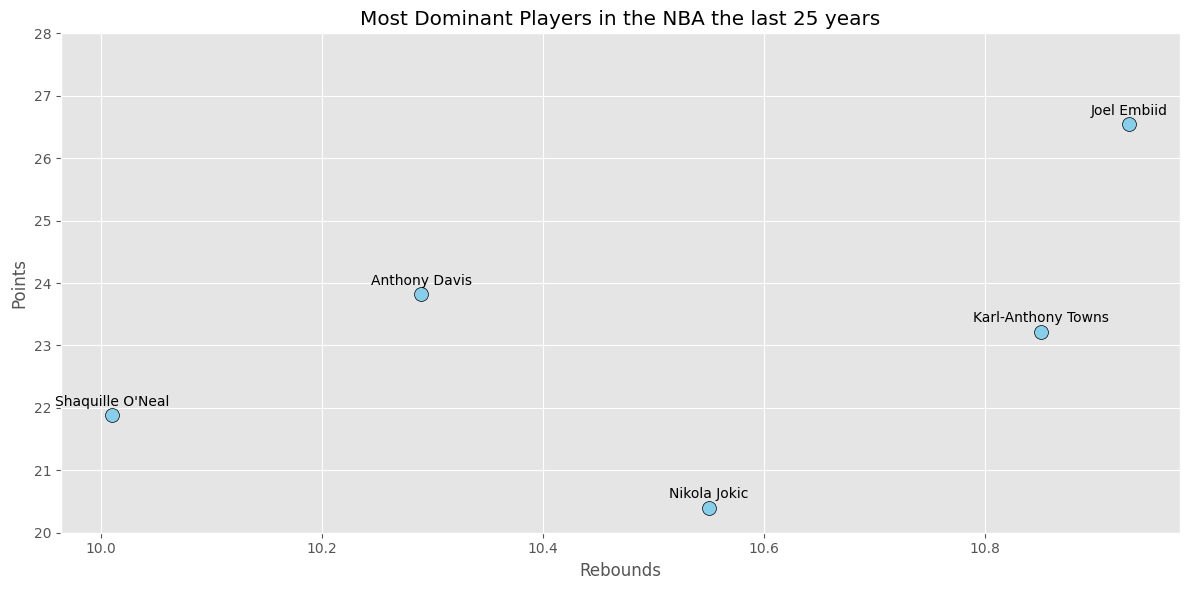

,player_name,pts,reb,ast,draft_number
1240,Joel Embiid,26.54,10.93,3.31,3.0
129,Anthony Davis,23.82,10.29,2.45,1.0
1379,Karl-Anthony Towns,23.22,10.85,3.48,1.0
2187,Shaquille O'Neal,21.88,10.01,2.42,1.0
1854,Nikola Jokic,20.40,10.55,6.71,41.0


In [27]:
dom = df1[(df1['pts'] > 20) & (df1['reb'] > 10)].sort_values(by = 'pts', ascending = False)

plt.figure(figsize = (12,6))
plt.scatter(dom['reb'],dom['pts'], s = 100, color='skyblue', edgecolors='black')
for i, player in enumerate(dom['player_name']):
    plt.annotate(player, (dom['reb'].iloc[i], dom['pts'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Rebounds')
plt.ylabel('Points')
plt.title('Most Dominant Players in the NBA the last 25 years')
plt.grid(True)
plt.ylim(20, 28)
plt.tight_layout()
plt.show()

dom[['player_name','pts','reb','ast','draft_number']]

As we see, there are only 5 NBA players who meet those criteria:
- Three of them (Joel Embiid, Anthony Davis, Karl-Anthony Towns) are still active.
- Three of them (Anthony Davis, Karl-Anthony Towns, Shaquille O'Neal) were the first draft pick.
- It's noticeable that Nicola Jokic was 41st draft pick in his draft season.

### 8. Best Playmakers and Scorers
A playmaking scorer is a player who excels in both scoring efficiently and creating opportunities for teammates. Unlike traditional point guards who focus primarily on passing the ball or shooting guards who are primarily scorers, playmaking scorers effectively combine both skills, making them key offensive leaders for their teams.

For this analysis, we define a player as a playmaking scorer if they meet the following criteria:

- Averaged at least 20 points per game (PPG) throughout their career
- Averaged at least 5 assists per game (APG) throughout their career

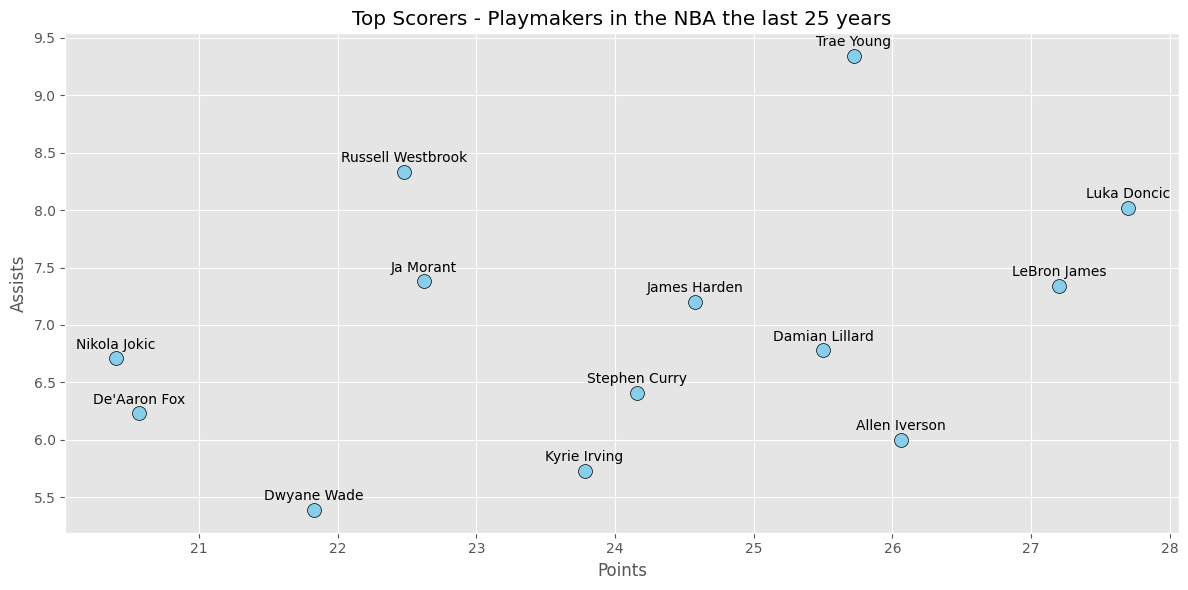

,pts,ast,draft_number
player_name,,,
Luka Doncic,27.70,8.02,3.0
LeBron James,27.20,7.34,1.0
Allen Iverson,26.06,6.00,1.0
Trae Young,25.72,9.34,5.0
Damian Lillard,25.50,6.78,6.0
James Harden,24.58,7.20,3.0
Stephen Curry,24.16,6.41,7.0
Kyrie Irving,23.78,5.73,1.0
Ja Morant,22.62,7.38,2.0


In [28]:
scor_pass = df1[(df1['pts'] > 20) & (df1['ast'] > 5)]

plt.figure(figsize = (12,6))
plt.scatter(x = scor_pass['pts'],y = scor_pass['ast'], s = 100, color='skyblue', edgecolors='black')
for i, player in enumerate(scor_pass['player_name']):
    plt.annotate(player, (scor_pass['pts'].iloc[i], scor_pass['ast'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('Top Scorers - Playmakers in the NBA the last 25 years')
plt.grid(True)
plt.tight_layout()
plt.show()

scor_pass[['player_name', 'pts', 'ast', 'draft_number']].sort_values(by=['pts','ast'], ascending=False).set_index('player_name')

There are 13 players in this list.

- Allen Iverson and Dwyane Wade are the only retired NBA players

- Nikola Jokic was the only player in dominant players list and in playmakers-scorers list. He was the 41-st in his draft season too, unlike the rest of them who were in the first top 10 picks

### 9. High Impact Contributors
There is a metric that can measure a player's impact when he is on the court, the `net_rating`. When referring to a player's net rating, it usually involves the point differential when that player is on the court per 100 possessions.
For example, if a player has a net rating of +2.05, it means that, on average, they are scoring 2.05 more points per 100 possessions than their opponents. This suggests that the team is performing well, with a positive impact on both offense and defense.

$$
Net\ Rating = Offensive\ Rating - Defensive\ Rating
$$

We are going to explore the top 20 most impactful players that have played at least 30 games on average in an NBA season.

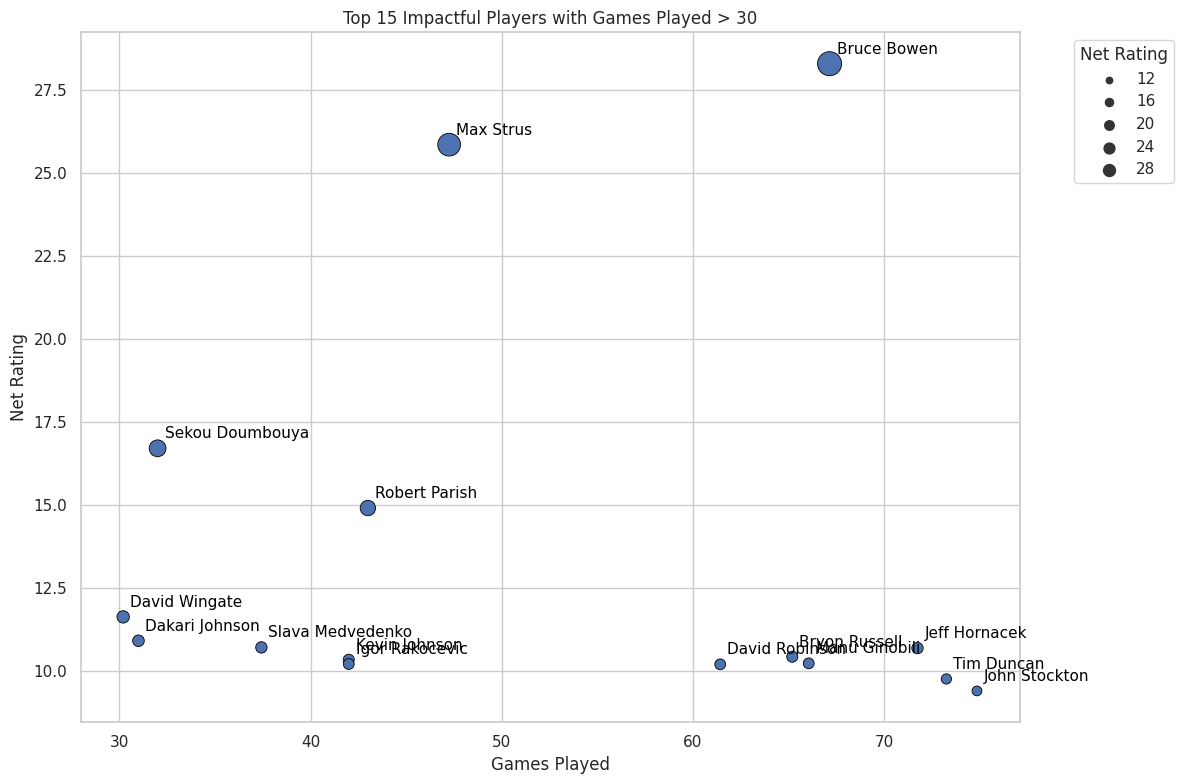

,net_rating,all_star,pts,reb,ast
player_name,,,,,
Bruce Bowen,28.29,No,5.38,2.50,1.12
Max Strus,25.85,No,7.68,1.95,1.02
Sekou Doumbouya,16.70,No,6.17,2.90,0.43
Robert Parish,14.90,No,3.70,2.10,0.50
David Wingate,11.62,No,2.64,0.64,0.90
Dakari Johnson,10.90,No,1.80,1.10,0.30
Slava Medvedenko,10.70,No,4.26,1.97,0.41
Jeff Hornacek,10.68,Yes,13.32,3.00,3.85
Bryon Russell,10.42,No,8.08,3.58,1.43


In [29]:
impact_players = df1[df1['gp'] > 30].sort_values(by='net_rating', ascending=False).head(15)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='gp', y='net_rating', data=impact_players, size='net_rating', sizes=(50, 300), palette='viridis', edgecolor='black')

plt.xlabel('Games Played')
plt.ylabel('Net Rating')
plt.title('Top 15 Impactful Players with Games Played > 30')

for i, player in enumerate(impact_players['player_name']):
    plt.annotate(player, (impact_players['gp'].iloc[i], impact_players['net_rating'].iloc[i]),
                 textcoords="offset points", xytext=(5, 5), ha='left', va='bottom', fontsize=11, color='black')

plt.legend(title='Net Rating', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=0.5)

plt.tight_layout()
plt.show()

impact_players[['player_name','net_rating','all_star', 'pts','reb','ast']].sort_values(by='net_rating', ascending=False).set_index('player_name')

- Bruce Bowen is the most impactful player in the NBA in the last 25 years.
- Four players of this list were/are all star class.